<a href="https://colab.research.google.com/github/rieko-shinji-shibainu/Data-Science/blob/main/%E6%9C%AC%E5%A1%81%E6%89%93%E8%A6%81%E5%9B%A0%E6%A4%9C%E8%A8%BC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# モジュールのインポート
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 24.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


# モデルの実装
1. データの読み込み
1. 目的変数と説明変数の切り分け
3. モデルの定義
4. モデルの学習
5. 結果の表示

### Webスクレイピングでデータの読み込み

In [ ]:
# サイトURLを変数に読み込む
# 2024年度阪神タイガース個人打撃成績
url = 'https://npb.jp/bis/2024/stats/idb1_t.html'

In [ ]:
# read_htmlでテーブルを読み込む
data = pd.read_html(url, header = 1)

In [ ]:
raw_data = data[0]
raw_data.head()

,Unnamed: 0,選 手,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,...,犠 打,犠 飛,四 球,故 意 四,死 球,三 振,併 殺 打,打 率,長 打 率,出 塁 率
0,NaN,青柳 晃洋,12,18,12,0,0,0,0,0,...,4,1,1,0,0,5,0,0.000,0.000,0.071
1,NaN,石井 大智,56,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
2,NaN,石黒 佑弥,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
3,*,伊藤 将司,18,22,18,2,1,0,0,0,...,4,0,0,0,0,11,0,0.056,0.056,0.056
4,*,糸原 健斗,89,128,111,8,24,2,0,0,...,0,1,15,0,1,20,3,0.216,0.234,0.313


### データ加工

In [ ]:
# 末尾データの確認
raw_data.tail()

,Unnamed: 0,選 手,試 合,打 席,打 数,得 点,安 打,二 塁 打,三 塁 打,本 塁 打,...,犠 打,犠 飛,四 球,故 意 四,死 球,三 振,併 殺 打,打 率,長 打 率,出 塁 率
44,NaN,ミエセス,14,19,18,1,2,0,0,0,...,0,0,1,0,0,5,1,0.111,0.111,0.158
45,*,村上 頌樹,25,48,44,0,5,0,0,0,...,3,0,1,0,0,24,0,0.114,0.114,0.133
46,NaN,森下 翔太,129,526,458,64,126,24,2,16,...,0,3,53,1,12,78,13,0.275,0.441,0.363
47,*,門別 啓人,5,2,2,0,0,0,0,0,...,0,0,0,0,0,1,0,0.000,0.000,0.000
48,NaN,渡邉 諒,67,137,123,7,32,5,0,2,...,0,2,11,0,1,34,2,0.260,0.350,0.321


In [ ]:
# 1列目を削除
raw_data = raw_data.drop(raw_data.columns[0], axis = 1)

In [ ]:
# 全ての列名の空白を削除
raw_data.columns = raw_data.columns.str.replace(' ', '')
raw_data.columns = raw_data.columns.str.replace('　', '')

In [ ]:
raw_data.head()

,選手,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,打率,長打率,出塁率
0,青柳 晃洋,12,18,12,0,0,0,0,0,0,...,4,1,1,0,0,5,0,0.000,0.000,0.071
1,石井 大智,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
2,石黒 佑弥,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
3,伊藤 将司,18,22,18,2,1,0,0,0,1,...,4,0,0,0,0,11,0,0.056,0.056,0.056
4,糸原 健斗,89,128,111,8,24,2,0,0,26,...,0,1,15,0,1,20,3,0.216,0.234,0.313


In [ ]:
# 行数・列数の確認
raw_data.shape

(49, 23)

In [ ]:
# 列名の確認
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   選手      49 non-null     object 
 1   試合      49 non-null     int64  
 2   打席      49 non-null     int64  
 3   打数      49 non-null     int64  
 4   得点      49 non-null     int64  
 5   安打      49 non-null     int64  
 6   二塁打     49 non-null     int64  
 7   三塁打     49 non-null     int64  
 8   本塁打     49 non-null     int64  
 9   塁打      49 non-null     int64  
 10  打点      49 non-null     int64  
 11  盗塁      49 non-null     int64  
 12  盗塁刺     49 non-null     int64  
 13  犠打      49 non-null     int64  
 14  犠飛      49 non-null     int64  
 15  四球      49 non-null     int64  
 16  故意四     49 non-null     int64  
 17  死球      49 non-null     int64  
 18  三振      49 non-null     int64  
 19  併殺打     49 non-null     int64  
 20  打率      49 non-null     float64
 21  長打率     49 non-null     float64
 22  出塁率 

In [ ]:
# 欠損値の確認
raw_data.isnull().sum()

,0
選手,0
試合,0
打席,0
打数,0
得点,0
安打,0
二塁打,0
三塁打,0
本塁打,0
塁打,0


In [ ]:
# ユニークな要素の数を検証
raw_data.nunique()

,0
選手,49
試合,38
打席,33
打数,33
得点,17
安打,25
二塁打,12
三塁打,5
本塁打,8
塁打,26


In [ ]:
# 統計量の確認
raw_data.describe()

,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,打率,長打率,出塁率
count,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,...,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000,49.000000
mean,44.979592,108.877551,95.795918,9.897959,23.204082,3.346939,0.346939,1.367347,31.346939,9.591837,...,2.346939,0.530612,9.000000,0.408163,1.204082,20.979592,2.448980,0.128408,0.164143,0.161980
std,41.682575,182.797888,160.639604,19.396354,41.938437,6.517767,0.990602,3.789755,59.027025,18.996621,...,5.942611,1.042873,16.615756,1.097694,2.621860,31.935801,4.623586,0.124778,0.164091,0.149356
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,32.000000,19.000000,18.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,0.125000,0.125000,0.174000
75%,62.000000,128.000000,111.000000,8.000000,24.000000,2.000000,0.000000,0.000000,26.000000,9.000000,...,1.000000,1.000000,11.000000,0.000000,1.000000,24.000000,2.000000,0.231000,0.291000,0.300000
max,143.000000,639.000000,562.000000,71.000000,160.000000,24.000000,5.000000,16.000000,204.000000,73.000000,...,35.000000,4.000000,68.000000,5.000000,12.000000,133.000000,19.000000,0.500000,0.500000,0.500000


### 可視化

In [ ]:
# 可視化していくために一通りインポート
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = 10, 5 # 描画サイズの設定

# 警告非表示
import warnings
warnings.filterwarnings('ignore')

!pip install -q japanize_matplotlib
import japanize_matplotlib

<Axes: xlabel='本塁打', ylabel='Density'>

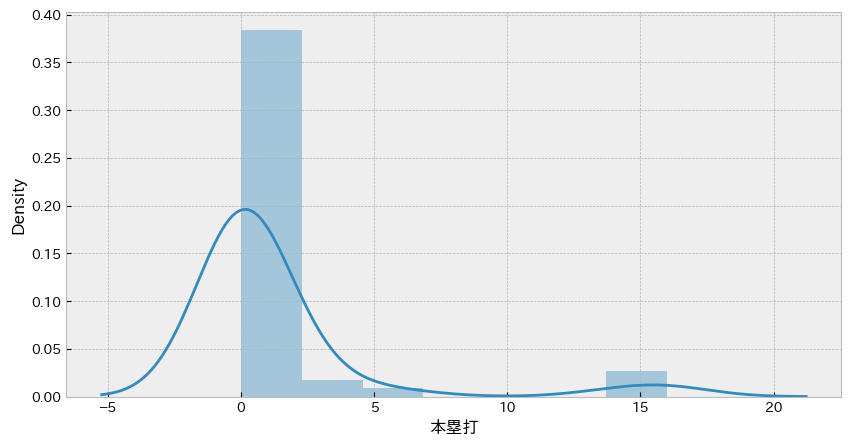

In [ ]:
# 本塁打の分布を確認
sns.distplot(raw_data['本塁打'])

→年間ホームラン数は0~2.5付近が一番多い。まれに優秀な選手が15本までいく

### 散布図と相関係数

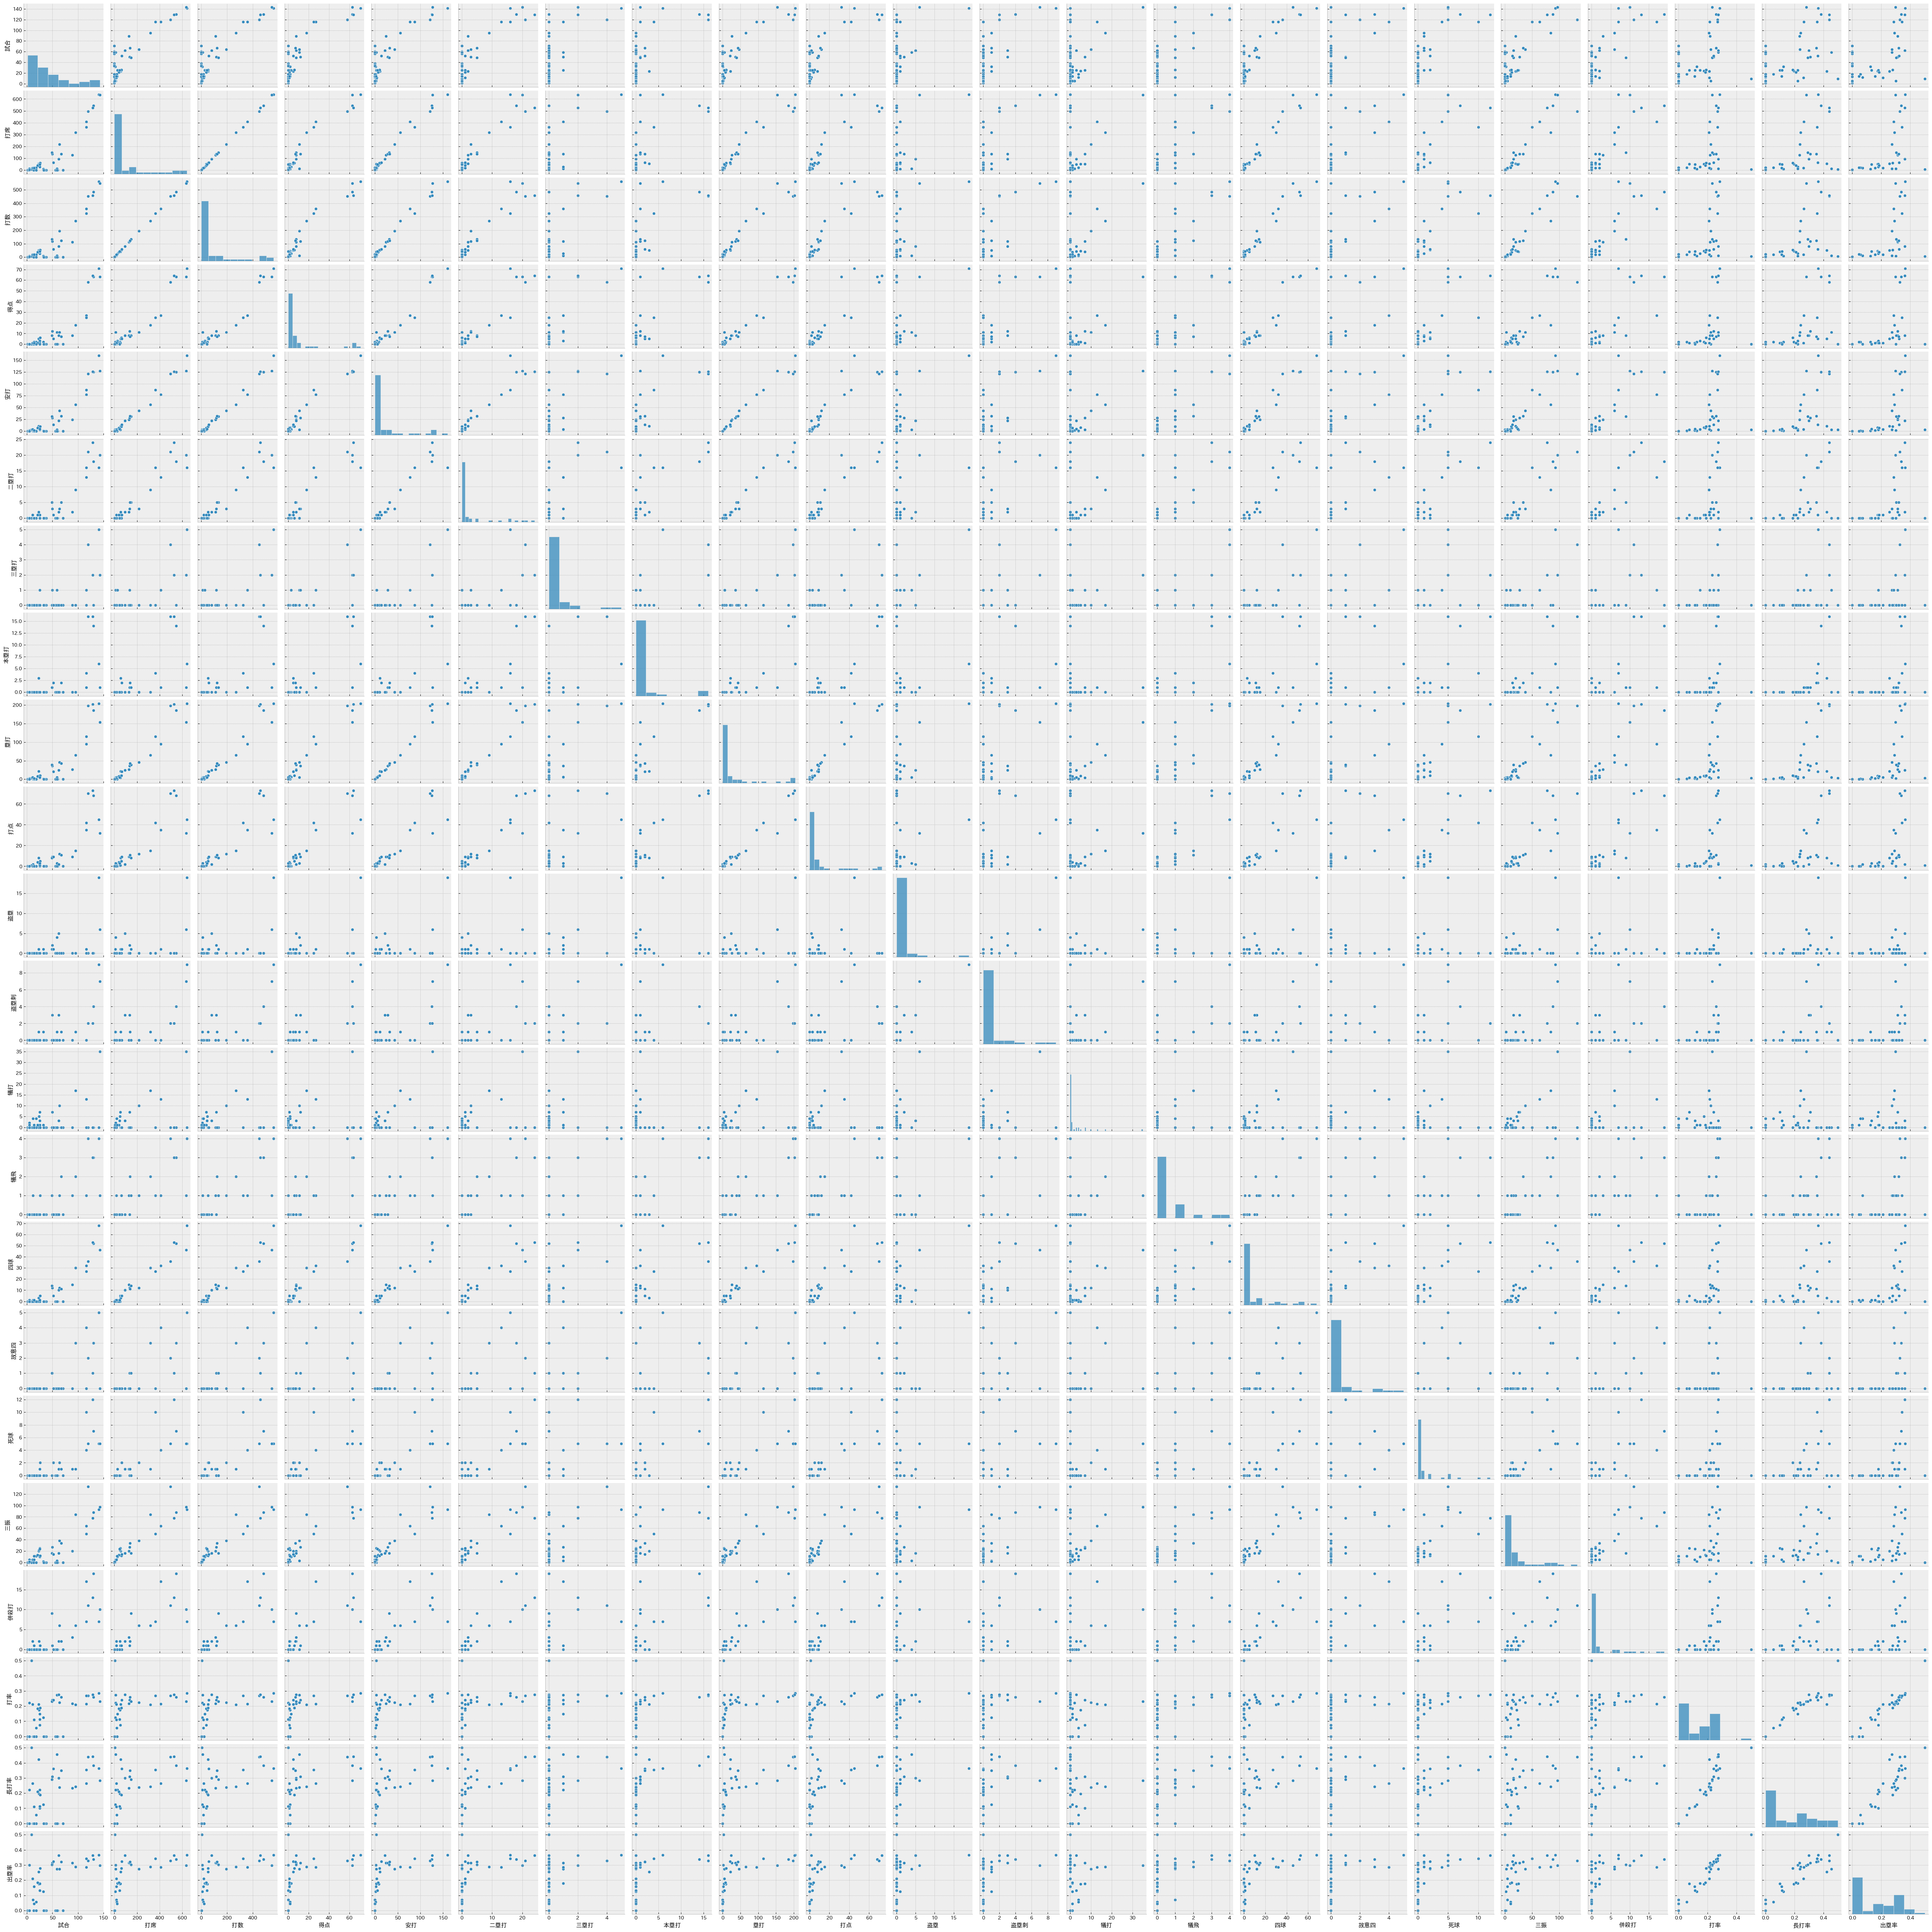

In [ ]:
# 全ての変数間の散布図をまとめて描画
sns.pairplot(raw_data)

→どれもあまり関係がなさそうだけど敢えていうなら打点と塁打？

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

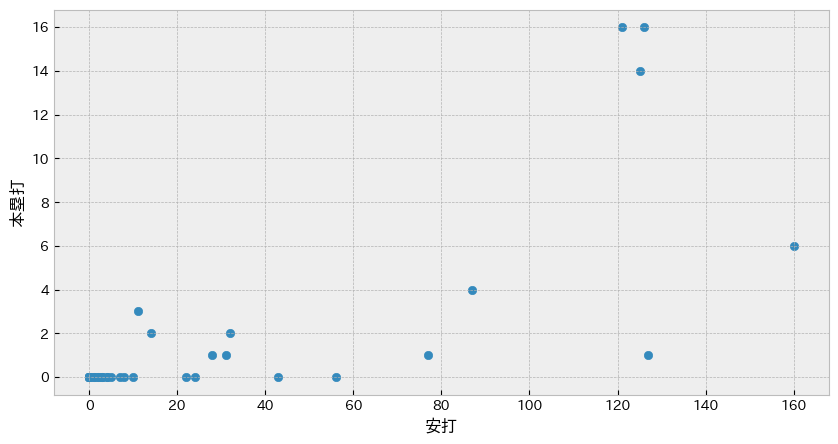

In [ ]:
# 安打と本塁打の散布図を描画
plt.scatter(raw_data['安打'], raw_data['本塁打'])
plt.xlabel('安打')
plt.ylabel('本塁打')
plt

→あまり関係がなさそう

In [ ]:
# 安打数と本塁打の相関係数を算出
raw_data['安打'].corr(raw_data['本塁打'])

0.7659413494233893

→相関係数自体は高い

In [ ]:
# 打点と本塁打の相関係数を算出
raw_data['打点'].corr(raw_data['本塁打'])

0.9212027377207954

In [ ]:
# 塁打と本塁打の相関係数を算出
raw_data['塁打'].corr(raw_data['本塁打'])

0.8467290031569922

In [ ]:
# 各変数のすべての組み合わせの相関係数を出す
raw_data.corr(numeric_only=True)

,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,打点,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,打率,長打率,出塁率
試合,1.000000,0.894242,0.893977,0.856223,0.887608,0.867861,0.612700,0.628477,0.868087,0.823900,...,0.397682,0.762280,0.882590,0.643107,0.775909,0.839192,0.797285,0.513752,0.570751,0.570338
打席,0.894242,1.000000,0.999732,0.966849,0.991931,0.964141,0.717004,0.717698,0.973526,0.912621,...,0.476583,0.853636,0.980447,0.731397,0.834525,0.949227,0.879833,0.552262,0.600538,0.612514
打数,0.893977,0.999732,1.000000,0.967942,0.993355,0.965853,0.721170,0.726504,0.976563,0.918115,...,0.462891,0.857985,0.979175,0.731698,0.836848,0.950807,0.881866,0.555209,0.605396,0.613913
得点,0.856223,0.966849,0.967942,1.000000,0.979391,0.950814,0.786896,0.806561,0.982606,0.931112,...,0.356919,0.862723,0.965695,0.692812,0.832039,0.912114,0.828459,0.511114,0.587185,0.557378
安打,0.887608,0.991931,0.993355,0.979391,1.000000,0.966768,0.755985,0.765941,0.990149,0.933266,...,0.377633,0.880603,0.983937,0.730377,0.854116,0.935696,0.858181,0.552689,0.609256,0.605743
二塁打,0.867861,0.964141,0.965853,0.950814,0.966768,1.000000,0.681166,0.815390,0.977220,0.960424,...,0.380334,0.839743,0.938194,0.640799,0.901585,0.926850,0.880308,0.515816,0.592809,0.566709
三塁打,0.612700,0.717004,0.721170,0.786896,0.755985,0.681166,1.000000,0.592430,0.760012,0.663079,...,0.180851,0.725578,0.725261,0.633428,0.509604,0.720670,0.461082,0.371487,0.445838,0.387138
本塁打,0.628477,0.717698,0.726504,0.806561,0.765941,0.815390,0.592430,1.000000,0.846729,0.921203,...,-0.094583,0.808872,0.731172,0.494057,0.784854,0.743687,0.709714,0.398826,0.532118,0.431790
塁打,0.868087,0.973526,0.976563,0.982606,0.990149,0.977220,0.760012,0.846729,1.000000,0.968821,...,0.298156,0.898540,0.967853,0.706108,0.874675,0.934582,0.859112,0.538926,0.615788,0.589116
打点,0.823900,0.912621,0.918115,0.931112,0.933266,0.960424,0.663079,0.921203,0.968821,1.000000,...,0.176969,0.873472,0.902588,0.651565,0.907714,0.893178,0.875715,0.510804,0.607288,0.558935


<Axes: >

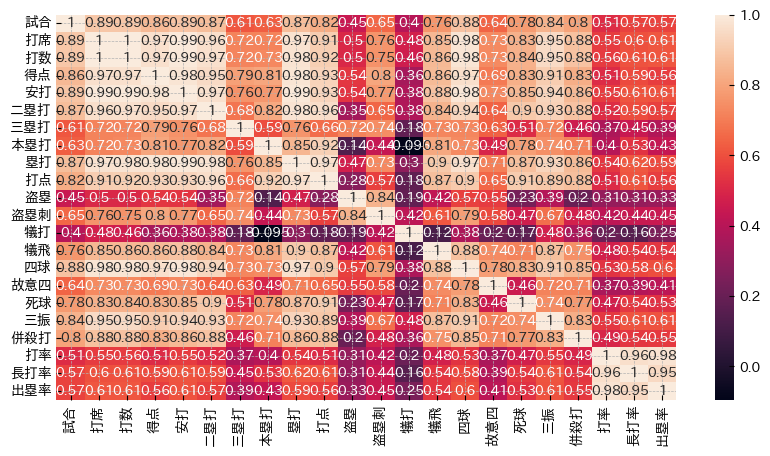

In [ ]:
# すべての変数の相関係数をヒートマップにする
sns.heatmap(raw_data.corr(numeric_only=True), annot=True)

### 重回帰分析

In [ ]:
# 変数の切り出し
# 互いに関係ある変数を除外
# 打点、得点→ホームラン成功すればこれらが高くなるので、ホームランの要因とは言えない
x = raw_data.drop(['本塁打','長打率','出塁率', '打席', '打数', '安打', '二塁打', '塁打', '選手', '打点', '得点'], axis=1)
y = raw_data['本塁打']
x.head()

,試合,三塁打,盗塁,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,打率
0,12,0,0,0,4,1,1,0,0,5,0,0.000
1,56,0,0,0,0,0,0,0,0,0,0,0.000
2,3,0,0,0,0,0,0,0,0,0,0,0.000
3,18,0,0,0,4,0,0,0,0,11,0,0.056
4,89,0,0,0,0,1,15,0,1,20,3,0.216


In [ ]:
# データの確認
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   試合      49 non-null     int64  
 1   得点      49 non-null     int64  
 2   三塁打     49 non-null     int64  
 3   打点      49 non-null     int64  
 4   盗塁      49 non-null     int64  
 5   盗塁刺     49 non-null     int64  
 6   犠打      49 non-null     int64  
 7   犠飛      49 non-null     int64  
 8   四球      49 non-null     int64  
 9   故意四     49 non-null     int64  
 10  死球      49 non-null     int64  
 11  三振      49 non-null     int64  
 12  併殺打     49 non-null     int64  
 13  打率      49 non-null     float64
dtypes: float64(1), int64(13)
memory usage: 5.5 KB


In [ ]:
# データの確認
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 49 entries, 0 to 48
Series name: 本塁打
Non-Null Count  Dtype
--------------  -----
49 non-null     int64
dtypes: int64(1)
memory usage: 524.0 bytes


In [ ]:
# 重回帰分析の定義
multi_ols = sm.OLS(y,sm.add_constant(x))

In [ ]:
# モデルの学習
result = multi_ols.fit()

In [ ]:
# 結果の確認
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    本塁打   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     65.82
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           8.80e-21
Time:                        12:44:07   Log-Likelihood:                -57.550
No. Observations:                  49   AIC:                             141.1
Df Residuals:                      36   BIC:                             165.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2752      0.249      1.107      0.276      -0.229       0.779
試合            -0.0097      0.007     -1.337      0.190      -0.024       0.005
三塁打            1.1631      0.315      3.687      0.001       0.523       1.803
盗塁            -0.8710      0.148     -5.870      0.000      -1.172      -0.570
盗塁刺            1.2296      0.270      4.558      0.000       0.683       1.777
犠打            -0.3683      0.045     -8.103      0.000      -0.461      -0.276
犠飛            -0.2315      0.472     -0.490      0.627      -1.190       0.727
四球             0.0433      0.070      0.619      0.540      -0.099       0.185
故意四           -0.4218      0.351     -1.200      0.238      -1.134       0.291
死球             0.2164      0.183      1.181      0.245      -0.155       0.588
三振             0.0544      0.019      2.855      0.007       0.016       0.093
併殺打            0.1766      0.086      2.043      0.048       0.001       0.352
打率            -0.6952      1.378     -0.505      0.617      -3.489       2.099
==============================================================================
Omnibus:                        3.301   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.551
Skew:                           0.239   Prob(JB):                        0.279
Kurtosis:                       4.010   Cond. No.                         770.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# 標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
#学習・適応
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.79940738, -0.35385963, -0.28831803, -0.40555355,  0.28105354,
         0.45475509, -0.4864602 , -0.37569038, -0.46400628, -0.50555136,
        -0.53515996, -1.03975363],
       [ 0.26712871, -0.35385963, -0.28831803, -0.40555355, -0.39902663,
        -0.51407097, -0.54726772, -0.37569038, -0.46400628, -0.66373793,
        -0.53515996, -1.03975363],
       [-1.01756249, -0.35385963, -0.28831803, -0.40555355, -0.39902663,
        -0.51407097, -0.54726772, -0.37569038, -0.46400628, -0.66373793,
        -0.53515996, -1.03975363],
       [-0.65397064, -0.35385963, -0.28831803, -0.40555355,  0.28105354,
        -0.51407097, -0.54726772, -0.37569038, -0.46400628, -0.31572748,
        -0.53515996, -0.58630736],
       [ 1.06703077, -0.35385963, -0.28831803, -0.40555355, -0.39902663,
         0.45475509,  0.36484515, -0.37569038, -0.07864513, -0.03099165,
         0.12041099,  0.70925343],
       [-0.53277336, -0.35385963,  0.05625718,  0.16222142, -0.39902663,
        -0.51407097, -

In [ ]:
# 重回帰分析の定義
multi_ols = sm.OLS(y,sm.add_constant(x_scaled))

In [ ]:
# モデルの学習
result = multi_ols.fit()

In [ ]:
# 結果の確認
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    本塁打   R-squared:                       0.956
Model:                            OLS   Adj. R-squared:                  0.942
Method:                 Least Squares   F-statistic:                     65.82
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           8.80e-21
Time:                        12:44:17   Log-Likelihood:                -57.550
No. Observations:                  49   AIC:                             141.1
Df Residuals:                      36   BIC:                             165.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.3673      0.131     10.476      0.000       1.103       1.632
x1            -0.4000      0.299     -1.337      0.190      -1.007       0.207
x2             1.1403      0.309      3.687      0.001       0.513       1.767
x3            -2.5278      0.431     -5.870      0.000      -3.401      -1.654
x4             2.1657      0.475      4.558      0.000       1.202       3.129
x5            -2.1663      0.267     -8.103      0.000      -2.709      -1.624
x6            -0.2390      0.488     -0.490      0.627      -1.228       0.750
x7             0.7123      1.151      0.619      0.540      -1.622       3.046
x8            -0.4582      0.382     -1.200      0.238      -1.232       0.316
x9             0.5617      0.476      1.181      0.245      -0.403       1.526
x10            1.7191      0.602      2.855      0.007       0.498       2.940
x11            0.8081      0.396      2.043      0.048       0.006       1.610
x12           -0.0859      0.170     -0.505      0.617      -0.431       0.259
==============================================================================
Omnibus:                        3.301   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.192   Jarque-Bera (JB):                2.551
Skew:                           0.239   Prob(JB):                        0.279
Kurtosis:                       4.010   Cond. No.                         27.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### 有効な変数
  - x2(1.14):三塁打
  - x3(-2.52):盗塁
  - x4(2.16):盗塁刺
  - x10(1.71):三振
  - x11(0.80):併殺打

#### （仮説）
 - 三塁打を放つほど調子のいい打者であること
 - 盗塁を狙うより確実に打つ練習を積み重ねている選手であること
 - 盗塁刺が記録されるものの、盗塁を試みるほど挑戦的な選手であること

### 分類

In [ ]:
# モジュールのインポート
!pip install -q japanize_matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import japanize_matplotlib
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
plt.style.use('bmh')

#### 決定木

In [ ]:
# 定義→学習→結果の確認
# 決定木の定義
from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier(random_state=0) #max_depthで深さを指定できる→予測のために精度を上げたい場合

# モデルの設定値=ハイパーパラメータを設定する

In [ ]:
# 決定木の学習
tree.fit(x,y)

DecisionTreeClassifier(random_state=0)

In [ ]:
# 決定木の結果の確認
# スコアチェック（どれくらい正解できるモデルになったのか）→重回帰でいうR-squreと似たようなもの
tree.score(x,y)

1.0

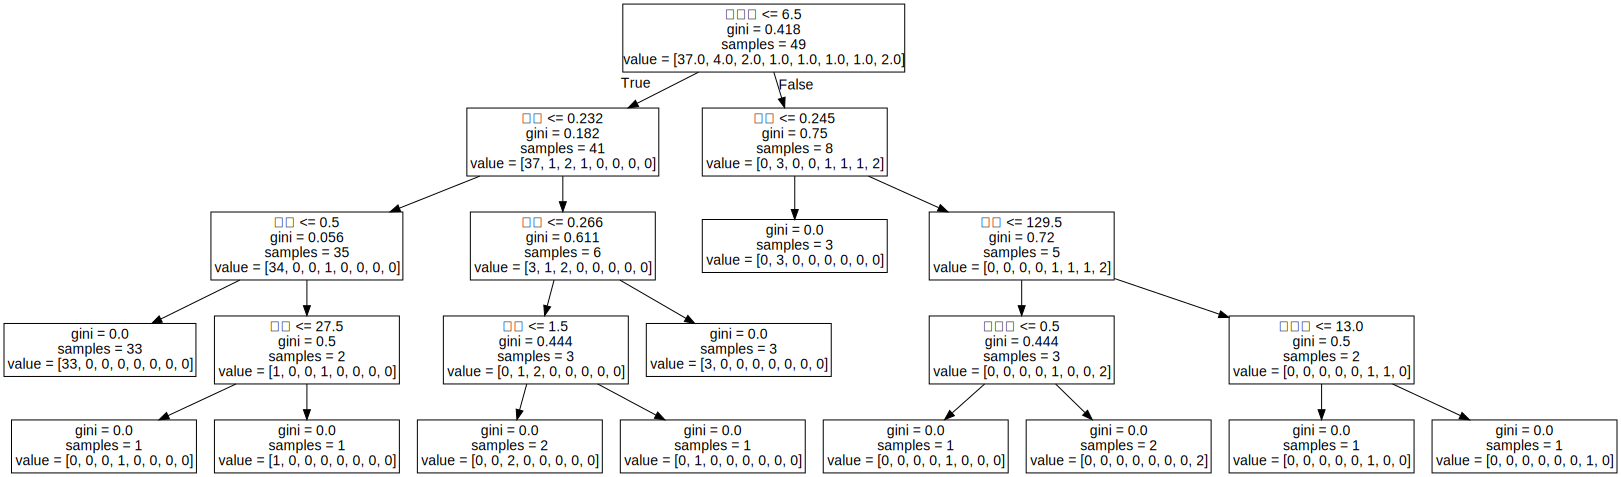

In [ ]:
# 木構造のチェック
import graphviz
from sklearn.tree import export_graphviz
dot_data = export_graphviz(tree, feature_names=x.columns)

# 木構造の表示
graph_tree = graphviz.Source(dot_data)
graph_tree

In [ ]:
# 説明変数の影響度
feature_importance = tree.feature_importances_
feature_importance

array([0.11062417, 0.        , 0.11108898, 0.        , 0.        ,
       0.        , 0.        , 0.06507304, 0.        , 0.        ,
       0.39172578, 0.32148803])

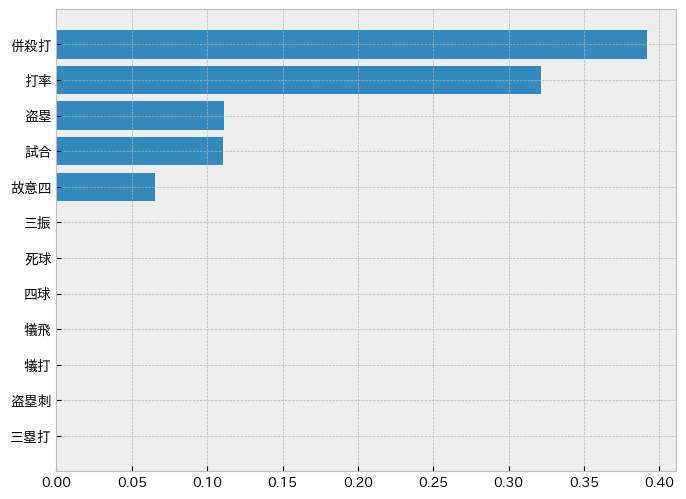

In [ ]:
# 可視化
out_df = pd.DataFrame(feature_importance, index=x.columns, columns=['特徴量重要度'])
out_df = out_df.sort_values('特徴量重要度')

# 横向きで表示
plt.figure(figsize=(8, 6))
plt.barh(out_df.index, out_df['特徴量重要度']);

### 決定木の結果からの仮説
 - 併殺打が関連→塁に選手がいると、打者は力んでしまう。ホームランバッターほどホームランを出そうとするが、力んでしまい結果ダブルプレーでアウトを取られる
 - 打率がよく普段からよく打っている選手がホームランを出せる

### ロジスティック回帰

In [ ]:
# データの確認
raw_data.head()

,選手,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,...,犠打,犠飛,四球,故意四,死球,三振,併殺打,打率,長打率,出塁率
0,青柳 晃洋,12,18,12,0,0,0,0,0,0,...,4,1,1,0,0,5,0,0.000,0.000,0.071
1,石井 大智,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
2,石黒 佑弥,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0.000,0.000,0.000
3,伊藤 将司,18,22,18,2,1,0,0,0,1,...,4,0,0,0,0,11,0,0.056,0.056,0.056
4,糸原 健斗,89,128,111,8,24,2,0,0,26,...,0,1,15,0,1,20,3,0.216,0.234,0.313


In [ ]:
# 本塁打を、0より大きいか1以上かで二値に分類
raw_data['本塁打_二値'] = (raw_data['本塁打'] >= 1).astype(int)

In [ ]:
raw_data.head(20)

,選手,試合,打席,打数,得点,安打,二塁打,三塁打,本塁打,塁打,...,犠飛,四球,故意四,死球,三振,併殺打,打率,長打率,出塁率,本塁打_二値
0,青柳 晃洋,12,18,12,0,0,0,0,0,0,...,1,1,0,0,5,0,0.000,0.000,0.071,0
1,石井 大智,56,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0
2,石黒 佑弥,3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0
3,伊藤 将司,18,22,18,2,1,0,0,0,1,...,0,0,0,0,11,0,0.056,0.056,0.056,0
4,糸原 健斗,89,128,111,8,24,2,0,0,26,...,1,15,0,1,20,3,0.216,0.234,0.313,0
5,井上 広大,23,55,52,5,11,2,0,3,22,...,0,3,0,0,20,0,0.212,0.423,0.255,1
6,岩崎 優,60,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0
7,岩貞 祐太,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0.000,0.000,0.000,0
8,植田 海,59,11,11,11,3,0,1,0,5,...,0,0,0,0,3,0,0.273,0.455,0.273,0
9,梅野 隆太郎,95,318,268,18,56,9,0,0,65,...,2,30,3,1,84,6,0.209,0.243,0.289,0


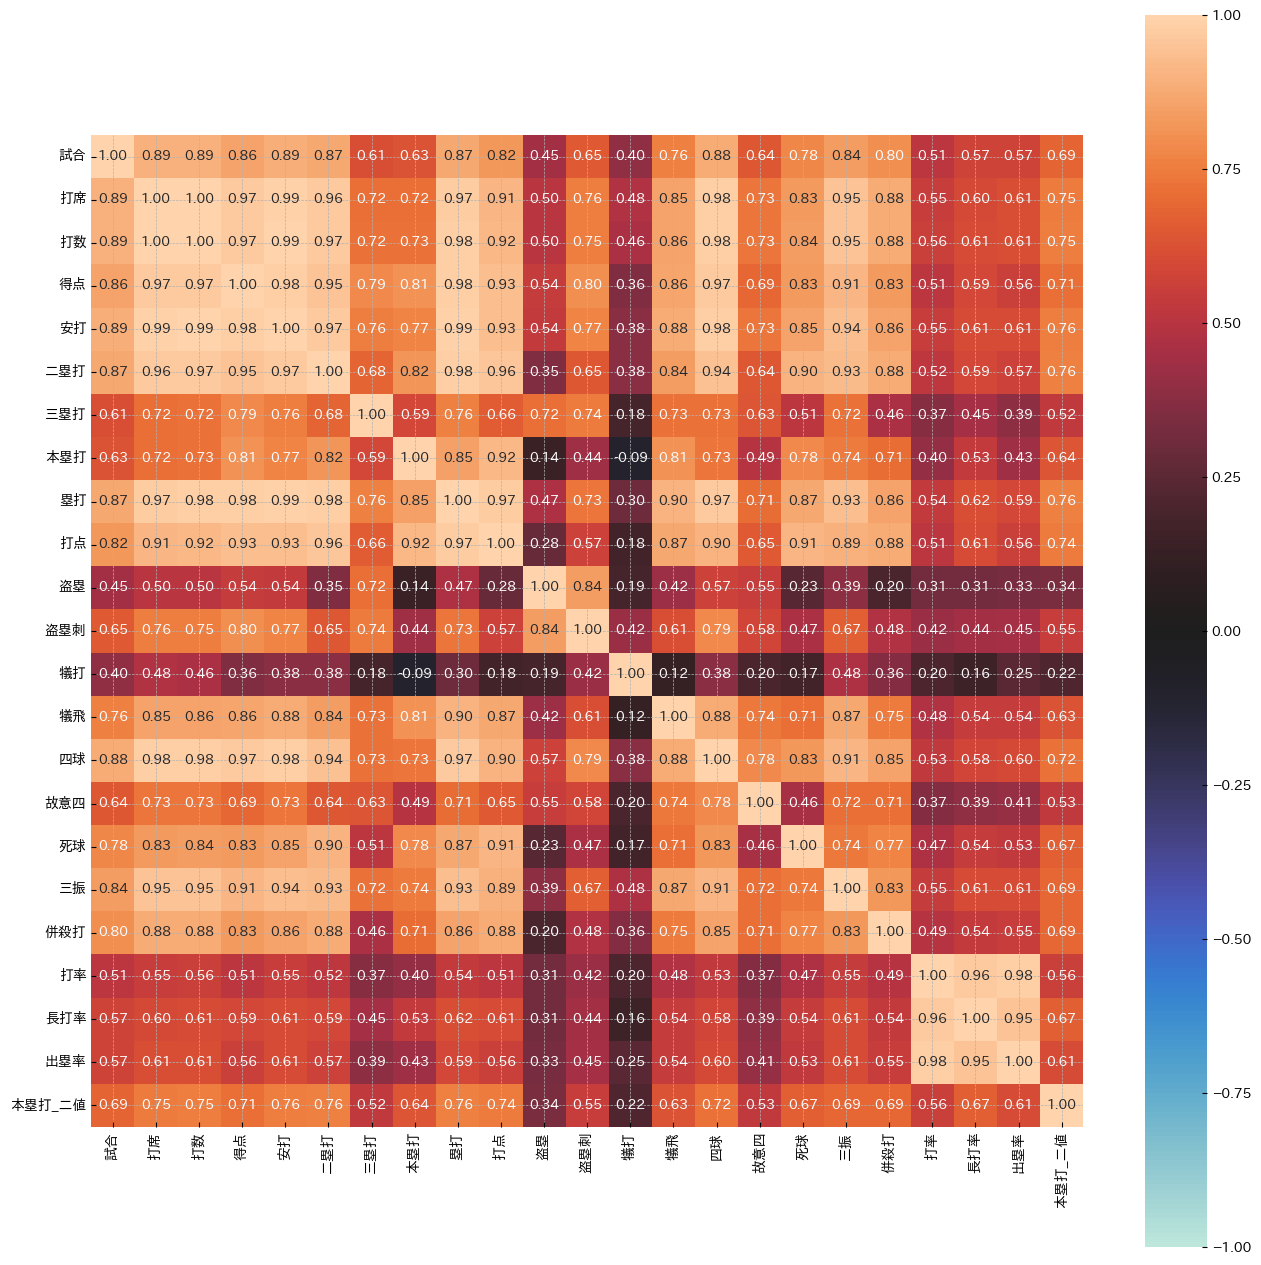

In [ ]:
# 相関分析
plt.rcParams['figure.figsize'] = 16, 16
sns.heatmap(raw_data.corr(numeric_only=True), annot=True, square=True, vmax=1, vmin=-1, center=0, fmt='.2f');

In [ ]:
# 変数の切り出し
# 互いに関係ある変数を除外
# 打点、得点→ホームラン成功すればこれらが高くなるので、ホームランの要因とは言えない
# 長打率の本塁打と関連
x = raw_data.drop(['本塁打', '本塁打_二値','長打率','出塁率', '打席', '打数', '安打', '二塁打', '塁打', '選手', '打点', '得点'], axis=1)
y = raw_data['本塁打_二値']
x.head()

,試合,三塁打,盗塁,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,打率
0,12,0,0,0,4,1,1,0,0,5,0,0.000
1,56,0,0,0,0,0,0,0,0,0,0,0.000
2,3,0,0,0,0,0,0,0,0,0,0,0.000
3,18,0,0,0,4,0,0,0,0,11,0,0.056
4,89,0,0,0,0,1,15,0,1,20,3,0.216


In [ ]:
# 説明変数の標準化
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_scaled.head()

,試合,三塁打,盗塁,盗塁刺,犠打,犠飛,四球,故意四,死球,三振,併殺打,打率
0,-0.799407,-0.35386,-0.288318,-0.405554,0.281054,0.454755,-0.486460,-0.37569,-0.464006,-0.505551,-0.535160,-1.039754
1,0.267129,-0.35386,-0.288318,-0.405554,-0.399027,-0.514071,-0.547268,-0.37569,-0.464006,-0.663738,-0.535160,-1.039754
2,-1.017562,-0.35386,-0.288318,-0.405554,-0.399027,-0.514071,-0.547268,-0.37569,-0.464006,-0.663738,-0.535160,-1.039754
3,-0.653971,-0.35386,-0.288318,-0.405554,0.281054,-0.514071,-0.547268,-0.37569,-0.464006,-0.315727,-0.535160,-0.586307
4,1.067031,-0.35386,-0.288318,-0.405554,-0.399027,0.454755,0.364845,-0.37569,-0.078645,-0.030992,0.120411,0.709253


In [ ]:
# ロジスティック回帰
# モデルの定義
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [ ]:
# モデル学習
model.fit(x_scaled, y)

LogisticRegression()

In [ ]:
# モデルの結果の確認
model.score(x_scaled, y)

0.8979591836734694

In [ ]:
# coefを確認
model.coef_

array([[ 0.21416646,  0.43841648,  0.03522919,  0.72221418, -0.77956607,
         0.12549391,  0.44081852,  0.15736467,  0.49205117,  0.46232417,
         0.5718001 ,  0.71393493]])

In [ ]:
# DataFrame に整形
result = pd.DataFrame(
    model.coef_.T,
    index = x.columns,
    columns = ['coef_']
)

result.sort_values('coef_', ascending=False)

,coef_
盗塁刺,0.722214
打率,0.713935
併殺打,0.571800
死球,0.492051
三振,0.462324
四球,0.440819
三塁打,0.438416
試合,0.214166
故意四,0.157365
犠飛,0.125494


### 結果
 - 盗塁刺、打率、併殺打の影響が大きい
 - 死球と三振はcoefの値がプラスなので、正の影響？（死球を受ける方がホームラン数が上がる？）

### 仮説
 - 盗塁刺→盗塁を試みるほどチャレンジ精神のある選手であること
 - 打率がよいほど普段からよく打っている選手であること
 - 併殺打→塁に選手がいることで力んでしまって結果ダブルプレーでアウトを取られる

### 結論
 - ホームランを出そうとしてダブルプレーをとられることから、選手の力みやプレッシャーを軽減させる必要がある
   - しかし結果的に併殺打の多い選手がホームラン数も多いので、失敗を恐れずどんどんチャレンジさせることが必要
 - 盗塁刺との関連から、盗塁を試みるチャレンジ精神が必要
 - 打率が高いことからも、普段から良く打っている選手もホームランを成功させやすい
 - →選手のホームラン数を上げるには、失敗を恐れず果敢にホームランを狙いに行く精神やチームの雰囲気づくりが必要
   - 選手がホームランを狙いやすい状況に持っていく力も必要と思われる（まず塁に走者を進める、出塁率を上げるなど）

### 分析の課題
 - 阪神タイガース選手データのそれぞれの説明変数には、交互作用がある。
 - 打率や打点、得点などにはそれぞれに相関関係がある